In [348]:
import tokenizer
import pickle
import pandas as pd
import numpy as np
import glob
import os
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
import json
import sparse_matrix_functions
import scipy.sparse as scs
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path = '/Users/ale/Dropbox (Yadlin Family)/galvanize/capstone/*.txt'

In [3]:
with open("gene_dictionary_final.pickle", "rb") as dict_gene:
        gene_dict = pickle.load(dict_gene)

In [4]:
gene_keys = set(gene_dict.keys())
gene_values = set(gene_dict.values())

In [5]:
gene_dict['her2']

'#erbb2#'

In [6]:
with open("drug_dictionary_final.pickle", "rb") as dict_drug:
        drug_dict = pickle.load(dict_drug)

In [7]:
drug_keys = set(drug_dict.keys())
drug_values = set(drug_dict.values())

In [8]:
drug_dict['lapatinib']

'#lapatinib#'

In [9]:
'#doxorubicin hydrochloride#' in drug_values

False

In [10]:
drug_dict['acridine carboxamide']

'#acridine#'

In [11]:
with open("greek_alphabet.pickle", "rb") as dict_greek:
        greek_dict = pickle.load(dict_greek)

In [12]:
import data_frame_creator
import sparse_matrix_functions

In [13]:
test=data_frame_creator.sparse_create_data_frame(path, short_list=True, min_df=0)

In [14]:
vocab_matrix =test[0]
vocab_matrix[vocab_matrix>1]=1
vocab_columns = test[1]
doc_names = test[2] 
orig_sentences =test[3]

In [15]:
col_idx=sparse_matrix_functions.column_indexing(vocab_columns)

In [16]:
'#lapatinib#'in vocab_columns

True

In [17]:
test_matrix_all = sparse_matrix_functions.pick_network_type(vocab_matrix, vocab_columns,kind='a')

In [18]:
test_matrix_all

<2892x398 sparse matrix of type '<class 'numpy.float64'>'
	with 5640 stored elements in Compressed Sparse Row format>

In [19]:
test_matrix_r = sparse_matrix_functions.pick_network_type(vocab_matrix,vocab_columns,'r')

In [20]:
test_matrix_s = sparse_matrix_functions.pick_network_type(vocab_matrix,vocab_columns,kind='s')

In [21]:
vocab_matrix

<2892x399 sparse matrix of type '<class 'numpy.int64'>'
	with 2930 stored elements in Compressed Sparse Row format>

In [22]:
test_matrix_r

<135x398 sparse matrix of type '<class 'numpy.int64'>'
	with 428 stored elements in Compressed Sparse Row format>

In [23]:
type(test_matrix_s)

scipy.sparse.csr.csr_matrix

In [24]:
non_empty_rows = sparse_matrix_functions.non_zero_rows(vocab_matrix)

In [ ]:
sentences = [orig_sentences[i] for i in non_empty_rows]

In [ ]:
files = [doc_names[i] for i in non_empty_rows]

In [ ]:
vocab_mat_clean=sparse_matrix_functions.remove_zero_rows(vocab_matrix)

In [ ]:
vocab_mat_clean

In [ ]:
vocab_matrix.shape

In [ ]:
print(list(vocab_matrix[:,vocab_columns.index('sensit')].indices))

In [ ]:
sensit2

In [25]:
network_genes=sparse_matrix_functions.get_network_rows(vocab_columns)

In [26]:
network_drugs =sparse_matrix_functions.get_network_columns(vocab_columns)

In [290]:
data_frame_creator.write_pickle('network_genes_test.pickle', network_genes)

In [28]:
resist_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_r, vocab_columns)

In [29]:
pairs_r, counts_r = sparse_matrix_functions.extract_gene_drug_pairs(resist_network_matrix, network_genes, network_drugs)

In [30]:
original_indeces_r = sparse_matrix_functions.back_to_original_indeces(pairs_r, col_idx)

In [31]:
resist_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences(
    'akt','lapatinib','r',7, test, original_indeces_r)

In [32]:
resist_evidence_akt_lapatinib

[('test.txt',
  'Treatment of the lapatinib-resistant HER2+ cells with Src inhibitors suppressed the PI3K PTEN Akt mTOR pathway as well as  Figure 5: Sites of Targeting the EGFR PI3K PTEN Akt mTORC Pathway with Small Molecule Membrane-Permeable Inhibitors and Monoclonal Antibodies (MoAbs).')]

In [33]:
sensit_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_s, vocab_columns)

In [34]:
pairs_s, counts_s = sparse_matrix_functions.extract_gene_drug_pairs(sensit_network_matrix, network_genes, network_drugs)

In [35]:
#(pairs_s,counts_s)

In [36]:
original_indeces_s = sparse_matrix_functions.back_to_original_indeces(pairs_s, col_idx)

In [37]:
sensit_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences(
    'akt','lapatinib','r',7,test, original_indeces_s)

In [38]:
sensit_evidence_akt_lapatinib

'There is no evidence that the prensece of the gene akt confers resistance to the drug lapatinib'

In [39]:
all_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_all, vocab_columns)

In [40]:
pairs_a, counts_a = sparse_matrix_functions.extract_gene_drug_pairs(all_network_matrix, network_genes, network_drugs)

In [41]:
original_indeces_a = sparse_matrix_functions.back_to_original_indeces(pairs_a, col_idx)

In [42]:
all_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences('akt','lapatinib','a',7, 
                                                                               test, original_indeces_a)

Returning evidence of both sensitivity and resistant


/Users/ale/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [43]:
all_evidence_akt_lapatinib

[('test.txt',
  'In BT474 and MCF10A breast cancer cells transfected with the construct encoding HER2-T798M mutation, elevated HER2 kinase activity was detected and lapatinib did not block phosphorylation of HER2, EGFR3 or downstream Akt and ERK1 2.'),
 ('test.txt',
  'Treatment of the lapatinib-resistant HER2+ cells with Src inhibitors suppressed the PI3K PTEN Akt mTOR pathway as well as  Figure 5: Sites of Targeting the EGFR PI3K PTEN Akt mTORC Pathway with Small Molecule Membrane-Permeable Inhibitors and Monoclonal Antibodies (MoAbs).'),
 ('test.txt',
  'I  Recurrent BC, -Stage IV BC, Active, not MK2206, paclitaxel Not Unspecified Adult recruiting Provided Solid Tumor Triciribine (an Akt inhibitor), Not paclitaxel, provided doxorubicin, cyclophosphamide Cisplatin, 0941, a inhibitor GDCNot PI3K provided  I  II  Metastatic Carcinoma Stage IV  BC, Currently Breast recruiting participants  I II  ER- BC, HER- BC, TNBC, Recurrent Currently BC, Stage IV BC recruiting participants  II  HER2

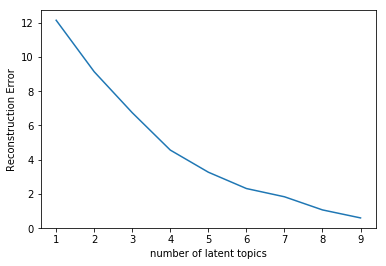

In [44]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(M,r):
    nmf = NMF(n_components=r)
    nmf.fit(M)
    W = nmf.transform(M)
    H = nmf.components_
    return nmf.reconstruction_err_

error = [fit_nmf(resist_network_matrix,i) for i in range(1,10)]
plt.plot(range(1,10), error)
plt.xticks(range(1, 10))
plt.xlabel('number of latent topics')
plt.ylabel('Reconstruction Error')

In [45]:
# Fit using 2 hidden concepts
nmf = NMF(n_components=2)
nmf.fit(resist_network_matrix)
W = nmf.transform(resist_network_matrix)
H = nmf.components_
print('RSS = %.2f' % nmf.reconstruction_err_)

RSS = 9.13


In [ ]:
# Make interpretable
W, H = (np.around(x,2) for x in (W,H))
W = pd.DataFrame(W,index=network_genes.values())
H = pd.DataFrame(H,columns=network_drugs.values())

#display(W) 
#display(H)

In [ ]:
resist_network_matrix

In [ ]:
type(resist_network_matrix)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
indices = np.arange(test2.shape[0])

In [ ]:
r_train, r_test, idxr_train, idxr_test = train_test_split(resist_network_matrix, indices, test_size=0.33, random_state=42)

In [ ]:
test_rgenes = [network_genes[idx] for idx in idxr_test]

In [ ]:
nmf_resist = NMF(n_components=3)
nmf_resist.fit(r_train)
W_r = nmf_resist.transform(r_test)
H_r = nmf_resist.components_
print('RSS = %.2f' % nmf.reconstruction_err_)


In [ ]:
W_r, H_r = (np.around(x,2) for x in (W_r,H_r))
W_r = pd.DataFrame(W_r,index=test_rgenes)
H_r = pd.DataFrame(H_r,columns=network_drugs.values())

display(W_r) 
display(H_r)

In [ ]:
s_train, s_test, idxs_train, idxs_test = train_test_split(sensit_network_matrix, indices, test_size=0.33, random_state=42)

In [ ]:
test_sgenes = [network_genes[idx] for idx in idxs_test]

In [ ]:
nmf_sensit = NMF(n_components=3)
nmf_sensit.fit(s_train)
W_s = nmf_sensit.transform(s_test)
H_s = nmf_sensit.components_
print('RSS = %.2f' % nmf.reconstruction_err_)

In [ ]:
W_s, H_s = (np.around(x,2) for x in (W_s,H_s))
W_s = pd.DataFrame(W_r,index=test_sgenes)
H_s = pd.DataFrame(H_r,columns=network_drugs.values())

display(W_s) 
display(H_s)

In [ ]:
print(sensit_network_matrix)

In [46]:
test = scs.coo_matrix(resist_network_matrix)

In [47]:
test

<327x70 sparse matrix of type '<class 'numpy.int64'>'
	with 140 stored elements in COOrdinate format>

In [48]:
mat_df=pd.DataFrame({'gene_id':test.row, 'drug_id':test.col, 'data':test.data})

In [49]:
mat_df.head()

,data,drug_id,gene_id
0,1,6,89
1,1,6,93
2,1,6,118
3,1,6,184
4,1,9,93


In [50]:
mat_df['log_data'] = np.log(mat_df['data']+1)

In [51]:
mat_df.head()

,data,drug_id,gene_id,log_data
0,1,6,89,0.693147
1,1,6,93,0.693147
2,1,6,118,0.693147
3,1,6,184,0.693147
4,1,9,93,0.693147


In [52]:
import pyspark

In [53]:
from pyspark.sql import SparkSession

In [ ]:
!source activate py36 && pip install py4j

In [ ]:
! conda env list

In [59]:
import pyspark.ml.recommendation

In [56]:
# Convert a Pandas DF to a Spark DF
spark_df = spark.createDataFrame(mat_df) 

In [270]:
# Create an untrained ALS model.
als_model = pyspark.ml.recommendation.ALS(
    itemCol='drug_id',
    userCol='gene_id',
    ratingCol='log_data',
    nonnegative=True,    
    #regParam=0.1,
    #rank=10
    ) 

In [271]:
ranks = [1,3,5]

In [272]:
regs = [0, 0.01, 0.1]

In [273]:
train_df, test_df = spark_df.randomSplit([0.9, 0.1], seed=427471138)

In [274]:
train_df.show()

+----+-------+-------+------------------+
|data|drug_id|gene_id|          log_data|
+----+-------+-------+------------------+
|   1|      6|     89|0.6931471805599453|
|   1|      6|     93|0.6931471805599453|
|   1|      6|    118|0.6931471805599453|
|   1|      6|    184|0.6931471805599453|
|   1|      9|    220|0.6931471805599453|
|   1|      9|    270|0.6931471805599453|
|   1|     10|     93|0.6931471805599453|
|   1|     10|    118|0.6931471805599453|
|   1|     10|    184|0.6931471805599453|
|   1|     11|     89|0.6931471805599453|
|   1|     11|     93|0.6931471805599453|
|   1|     11|    118|0.6931471805599453|
|   1|     11|    184|0.6931471805599453|
|   1|     14|     89|0.6931471805599453|
|   1|     14|    118|0.6931471805599453|
|   1|     14|    184|0.6931471805599453|
|   1|     14|    220|0.6931471805599453|
|   1|     14|    270|0.6931471805599453|
|   1|     17|     93|0.6931471805599453|
|   1|     18|     89|0.6931471805599453|
+----+-------+-------+------------

In [285]:
for rank in ranks:
    for reg in regs:
        als_model = pyspark.ml.recommendation.ALS(
        itemCol='drug_id',
        userCol='gene_id',
        ratingCol='log_data',
        nonnegative=True,    
        regParam=reg,
        rank=rank)
        drug_recommender = als_model.fit(train_df)
        drug_predictions = drug_recommender.transform(test_df)
        drug_predictions.na.drop("any")
        drug_predictions.show()
        rmse_eval=RegressionEvaluator(metricName="rmse",  labelCol='log_data', predictionCol='prediction')
        print(rmse_eval.evaluate(drug_predictions))

+----+-------+-------+------------------+----------+
|data|drug_id|gene_id|          log_data|prediction|
+----+-------+-------+------------------+----------+
|   1|     28|     93|0.6931471805599453|  0.894587|
|   1|     22|     93|0.6931471805599453|  0.894587|
|   1|     61|      8|0.6931471805599453| 1.0155497|
|   1|      9|     93|0.6931471805599453| 0.9001406|
|   1|     17|    220|0.6931471805599453| 0.6573268|
|   1|     17|    270|0.6931471805599453|0.34804526|
|   1|     23|    220|0.6931471805599453| 0.9399785|
|   1|     10|     89|0.6931471805599453| 0.6418624|
|   1|     38|    118|0.6931471805599453|0.63482386|
|   1|     25|    118|0.6931471805599453|0.63482386|
|   1|     60|     93|0.6931471805599453|  0.894587|
|   1|     42|    167|0.6931471805599453|       NaN|
|   5|     66|     55| 1.791759469228055| 1.7088627|
|   1|     66|      8|0.6931471805599453| 3.3708239|
|   6|     66|    240|1.9459101490553132| 2.7589166|
|   1|     67|     93|0.6931471805599453|0.753

nan
+----+-------+-------+------------------+----------+
|data|drug_id|gene_id|          log_data|prediction|
+----+-------+-------+------------------+----------+
|   1|     28|     93|0.6931471805599453| 0.6629158|
|   1|     22|     93|0.6931471805599453| 0.6629158|
|   1|     61|      8|0.6931471805599453| 0.5794986|
|   1|      9|     93|0.6931471805599453| 0.7225971|
|   1|     17|    220|0.6931471805599453| 0.4126319|
|   1|     17|    270|0.6931471805599453| 0.2554496|
|   1|     23|    220|0.6931471805599453| 0.6893439|
|   1|     10|     89|0.6931471805599453| 0.6783618|
|   1|     38|    118|0.6931471805599453|0.67732733|
|   1|     25|    118|0.6931471805599453|0.67732733|
|   1|     60|     93|0.6931471805599453| 0.6629158|
|   1|     42|    167|0.6931471805599453|       NaN|
|   5|     66|     55| 1.791759469228055| 1.5497143|
|   1|     66|      8|0.6931471805599453| 1.6105597|
|   6|     66|    240|1.9459101490553132|  1.611935|
|   1|     67|     93|0.6931471805599453|0

In [64]:
train_df, test_df = spark_df.randomSplit([0.8, 0.2], seed=427471138)

In [65]:
# Train the ALS model. We'll call the trained model `recommender`.
drug_recommender = als_model.fit(train_df)

In [69]:
drug_predictions = drug_recommender.transform(test_df)

In [72]:
drug_predictions.toPandas()

,data,drug_id,gene_id,log_data,prediction
0,1,28,93,0.693147,0.797905
1,1,22,93,0.693147,0.797811
2,1,22,118,0.693147,0.595789
3,1,47,220,0.693147,0.792780
4,1,47,270,0.693147,0.524112
5,1,6,89,0.693147,0.544803
6,1,37,93,0.693147,1.331818
7,1,61,8,0.693147,0.741295
8,1,9,93,0.693147,0.767219
9,1,9,220,0.693147,0.536341


In [75]:
drug_recommender.itemFactors.show()

+---+--------------------+
| id|            features|
+---+--------------------+
| 10|[0.31725955, 0.03...|
| 30|[0.100674726, 0.2...|
| 60|[0.33753693, 0.04...|
| 11|[0.32478464, 0.03...|
| 31|[0.2961194, 0.086...|
| 61|[0.027094483, 0.2...|
| 22|[0.33747894, 0.04...|
| 42|[0.0, 0.0, 0.1109...|
| 52|[0.32478464, 0.03...|
| 62|[0.32478464, 0.03...|
| 23|[0.32851702, 0.05...|
| 63|[0.31725955, 0.03...|
| 14|[0.31998923, 0.03...|
| 25|[0.2950566, 0.034...|
| 35|[0.37945074, 0.0,...|
| 55|[0.17510338, 0.11...|
|  6|[0.31725955, 0.03...|
| 26|[0.3186632, 0.024...|
| 36|[0.2970438, 0.036...|
| 46|[0.3168087, 0.034...|
+---+--------------------+
only showing top 20 rows



In [82]:
drug_predictions.describe()

DataFrame[summary: string, data: string, drug_id: string, gene_id: string, log_data: string, prediction: string]

In [218]:
# Create an untrained ALS model.
als_model = pyspark.ml.recommendation.ALS(
    #itemCol='drug_id',
    #userCol='gene_id',
    #ratingCol='log_data',
    #nonnegative=True,    
    #regParam=0.1,
    #rank=10
    ) 

In [150]:
# Train the ALS model. We'll call the trained model `recommender`.
drug_recommender = als_model.fit(spark_df)

In [219]:
from pyspark.ml import Pipeline

In [220]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [221]:
from pyspark.ml.evaluation import RegressionEvaluator

In [222]:
rmse_eval=RegressionEvaluator(metricName="rmse", labelCol='log_data', predictionCol='prediction')

In [223]:
pipeline = Pipeline(stages=[als_model])

In [225]:
paramGrid = (ParamGridBuilder()
             .addGrid(als_model.itemCol,['drug_id'])
             .addGrid(als_model.userCol,['gene_id'])
             .addGrid(als_model.ratingCol,['log_data'])
             .addGrid(als_model.rank, [1,2,3])
             .addGrid(als_model.regParam, [1, 0.1])#, 0.01, 0.001, 0.0001, 0])
             .build())
#.addGrid(drug_recommender.regParam, [1, 0.1, 0.01, 0.001, 0.0001, 0])

In [226]:
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=rmse_eval,
                          numFolds=5)

In [228]:
cvModel = crossval.fit(spark_df)

In [229]:
cvModel.bestModel

PipelineModel_4c15b0299c5283f5e272

In [230]:
bestmodel.rank

1

In [232]:
bestmodel._java_obj.getRegParam()

Py4JError: An error occurred while calling o7686.getRegParam. Trace:
py4j.Py4JException: Method getRegParam([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:326)
	at py4j.Gateway.invoke(Gateway.java:272)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)



In [106]:
def process_genes():
    genes = input('For what genes would you like to get drug interaction information? ')
    gene_list=genes.split(', ')
    processed_gene_list = []
    for id in gene_list:
        try: 
            gene_dict[id]
            processed_gene_list.append(gene_dict[id])
        except KeyError:
            print("Gene: {} not in list".format(id)) 
    return processed_gene_list

In [107]:
inverse_network_genes = dict((v, k) for k, v in network_genes.items())

In [108]:
inverse_network_drugs = dict((v, k) for k, v in network_drugs.items())

In [109]:
inverse_network_genes['#akt1#']

8

In [110]:
inverse_network_drugs['#trastuzumab#']

66

In [349]:
import graph_maker

In [302]:
b = graph_maker.get_user_input()

For what genes would you like to get drug interaction information?:, enter "all" for full network  all
if you are interested on drug resistance evidence press "r"if you are interested on drug resistance evidence press "s"if you are interested on general interactions press "g" if you are interested on all of above interactions press "a" r

 no drug interactions with gene #acadl# were found in our database

 no drug interactions with gene #ackr3# were found in our database

 no drug interactions with gene #acpp# were found in our database

 no drug interactions with gene #ado# were found in our database

 no drug interactions with gene #agfg1# were found in our database

 no drug interactions with gene #aicda# were found in our database

 no drug interactions with gene #airn# were found in our database

 no drug interactions with gene #alb# were found in our database

 no drug interactions with gene #alpi# were found in our database

 no drug interactions with gene #alyref# were found in

In [303]:
b

[{('#abcg2#', '#mitoxantrone#'): 1.0,
  ('#akt1#', '#lapatinib#'): 1.0,
  ('#akt1#', '#letrozole#'): 4.0,
  ('#akt1#', '#tamoxifen#'): 1.0,
  ('#akt1#', '#trastuzumab#'): 1.0,
  ('#anpep#', '#lapatinib#'): 1.0,
  ('#birc5#', '#trastuzumab#'): 2.0,
  ('#c19orf66#', '#tamoxifen#'): 1.0,
  ('#celp#', '#letrozole#'): 1.0,
  ('#celp#', '#recombinant interleukin-6#'): 1.0,
  ('#celp#', '#tamoxifen#'): 1.0,
  ('#celp#', '#trastuzumab#'): 5.0,
  ('#cic#', '#letrozole#'): 1.0,
  ('#cic#', '#recombinant interleukin-6#'): 1.0,
  ('#cyp19a1#', '#tamoxifen#'): 1.0,
  ('#dgcr2#', '#tamoxifen#'): 1.0,
  ('#egfr#', '#lapatinib#'): 2.0,
  ('#egr3#', '#bevacizumab#'): 1.0,
  ('#egr3#', '#capecitabine#'): 1.0,
  ('#egr3#', '#carbendazim#'): 1.0,
  ('#egr3#', '#cisplatin#'): 1.0,
  ('#egr3#', '#dacarbazine#'): 1.0,
  ('#egr3#', '#docetaxel#'): 1.0,
  ('#egr3#', '#doxorubicin#'): 1.0,
  ('#egr3#', '#erlotinib#'): 1.0,
  ('#egr3#', '#everolimus#'): 1.0,
  ('#egr3#', '#fluorouracil#'): 1.0,
  ('#egr3#', '#le

In [114]:
data_frame_creator.write_pickle('resist_network_matrix_test.pickle',resist_network_matrix)

In [115]:
data_frame_creator.write_pickle('sensit_network_matrix_test.pickle',sensit_network_matrix)

In [117]:
data_frame_creator.write_pickle('any_network_matrix_test.pickle',all_network_matrix)

In [311]:
list(network_genes.values())

['#abcg2#',
 '#acadl#',
 '#ackr3#',
 '#acpp#',
 '#ado#',
 '#agfg1#',
 '#aicda#',
 '#airn#',
 '#akt1#',
 '#alb#',
 '#alpi#',
 '#alyref#',
 '#amh#',
 '#anpep#',
 '#ar#',
 '#arc#',
 '#areg#',
 '#arhgef7#',
 '#armc9#',
 '#atg12#',
 '#atm#',
 '#atr#',
 '#bank1#',
 '#bax#',
 '#bbc3#',
 '#bcl2#',
 '#bcs1l#',
 '#bid#',
 '#birc5#',
 '#bivm#',
 '#bmi1#',
 '#bmp7#',
 '#bpifa4p#',
 '#braf#',
 '#brca1#',
 '#brca2#',
 '#brd2#',
 '#brip1#',
 '#c19orf66#',
 '#c1qbp#',
 '#ca1#',
 '#cat#',
 '#ccnd1#',
 '#ccng2#',
 '#cct#',
 '#cd24#',
 '#cd44#',
 '#cdh1#',
 '#cdh17#',
 '#cdk2#',
 '#cdk4#',
 '#cdkn1a#',
 '#cdkn1b#',
 '#cdkn2a#',
 '#cebpd#',
 '#celp#',
 '#chek1#',
 '#chek2#',
 '#cic#',
 '#cish#',
 '#cnr1#',
 '#cox8a#',
 '#cp#',
 '#cs#',
 '#csn1s1#',
 '#ctbp1#',
 '#ctnnb1#',
 '#cxcr4#',
 '#cycs#',
 '#cyp19a1#',
 '#cyp4z1#',
 '#cyp4z2p#',
 '#dalir#',
 '#dcstamp#',
 '#des#',
 '#dgcr2#',
 '#dlx4#',
 '#dna2#',
 '#dpm1#',
 '#dpm2#',
 '#duoxa1#',
 '#dusp4#',
 '#e2f1#',
 '#eaf2#',
 '#eec1#',
 '#eef2#',
 '#eef2k#',

In [ ]:
def extract_gene_drug_interaction(X,genes_list):

    interaction_dict={}
    genes =[]
    for gene in genes_list:
        multiplier = np.zeros((X.shape[0],1))
        idx = inverse_network_genes[gene]
        multiplier[idx]=1
        value = X.T.dot(multiplier) 
        drug_idx = value.nonzero()[0]
        if sum(value) == 0:
            print('\n no drug interactions with gene {} were found in our database'.format(gene))
        else:
            #interaction_dict[gene] = value
            drug_idx = value.nonzero()[0]
            for idx in drug_idx:
                interaction_dict[gene, network_drugs[idx]]=value[idx,0]
            genes.append(gene)
    print('\nthese are the genes for which interactions with drugs were found:',genes )
    return interaction_dict
            
            
        
        
        

In [ ]:
def get_user_input():    
    genes_list = process_genes()
    kind = input('if you are interested on drug resistance evidence press "r"' 
                'if you are interested on drug resistance evidence press "s"' 
                 'if you are interested on general interactions press "g" '
                'if you are interested on all of above interactions press "a" ')
    interaction_list =[]
    if kind == 'r' or kind =='R':
        X = resist_network_matrix
        resistant_dict = extract_gene_drug_interaction(X,genes_list)
        interaction_list.append(resistant_dict) 
    elif kind == 's' or kind =='S':
        X = sensit_network_matrix
        sensitive_dict = extract_gene_drug_interaction(X,genes_list)
        interaction_list.append(sensitive_dict)    
    elif kind == 'g' or kind =='G':
        X = all_network_matrix
        sensitive_dict = extract_gene_drug_interaction(X,genes_list)
        interaction_list.append(sensitive_dict)
    else:
        X = all_network_matrix
        interaction_dict = extract_gene_drug_interaction(X,genes_list)
        interaction_list.append(interaction_dict)
        X = resist_network_matrix
        resistant_dict = extract_gene_drug_interaction(X,genes_list)
        interaction_list.append(resistant_dict)
        X = sensit_network_matrix
        sensitive_dict = extract_gene_drug_interaction(X,genes_list)
        interaction_list.append(sensitive_dict)  
    return interaction_list

In [286]:
b=get_user_input()

NameError: name 'get_user_input' is not defined

In [ ]:
b

In [335]:
def gene_or_drug(vocabulary):
    gene_or_drug={}
    for item in vocabulary:
        if item in gene_values:
            gene_or_drug[item]='gene'
        if item in drug_values:
            gene_or_drug[item]='drug'
    return gene_or_drug

In [340]:
dg=gene_or_drug(vocab_columns)

In [342]:
data_frame_creator.write_pickle('gene_or_drug.pickle',dg)

In [ ]:
len(b)

In [127]:
import networkx as nx

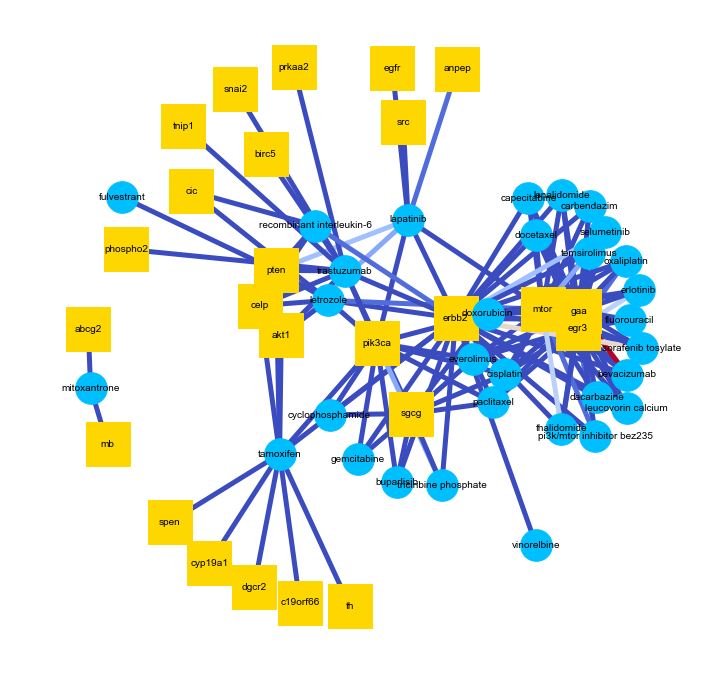

In [350]:
make_display_network(b)

In [307]:
def make_display_network(lst):
     
    
    if len(lst) ==1:
        G=nx.Graph()
        for (gene,drug), weight in lst[0].items():
            G.add_edge(gene[1:-1],drug[1:-1],weight=weight)
        weights = list(np.array(list(lst[0].values())))
        gene_nodes = get_node_set(G.edges)[0]
        drug_nodes = get_node_set(G.edges)[1]
        plt.figure(1,figsize=(12,12))
        G = draw_graph(G, gene_nodes, drug_nodes, weights, style='solid')
        plt.axis('off')
        plt.savefig("weighted_graph.png") # save as png
        plt.show() # display
        Graphs = G




    
    
        
    if len(lst) == 3:
        G1=nx.Graph()
        G2=nx.Graph()
        G3=nx.Graph()
        for (gene,drug), weight in lst[0].items():
            G1.add_edge(gene[1:-1],drug[1:-1],weight=weight)
        weights_1 = list(np.array(list(lst[0].values())))
        gene_nodes_1 = get_node_set(G1.edges)[0]
        drug_nodes_1 = get_node_set(G1.edges)[1]
        for (gene,drug), weight in lst[1].items():
            G2.add_edge(gene[1:-1],drug[1:-1],weight=weight)
        weights_2 = list(np.array(list(lst[1].values())))
        gene_nodes_2 = get_node_set(G2.edges)[0]
        drug_nodes_2 = get_node_set(G2.edges)[1] 
        for (gene,drug), weight in lst[2].items():
            G3.add_edge(gene[1:-1],drug[1:-1],weight=weight)
        weights_3 = list(np.array(list(lst[2].values())))
        gene_nodes_3 = get_node_set(G3.edges)[0]
        drug_nodes_3 = get_node_set(G3.edges)[1] 
        
        #for edge in list(G2.edges):
        #    if edge in list(G1.edges):
        #        G1.remove_edge(edge)
        #for edge in G3.edges:
        #    if edge in G1.edges:
        #        G1.remove_edge(edge)
        plt.figure(1,figsize=(12,12)) 
    
        G1 = draw_graph(G1, gene_nodes_1, drug_nodes_1, weights_1, style='dotted')
        G2 = draw_graph(G2, gene_nodes_2, drug_nodes_2, weights_2, style='dashed')
        G3 = draw_graph(G3, gene_nodes_3, drug_nodes_3, weights_3, style='solid')
        Graphs = [G1, G2, G3]
    
        plt.axis('off')
        plt.savefig("weighted_graph.png") # save as png
        plt.show() # display
        
    return Graphs
        


In [308]:
def draw_graph(G, gene_nodes, drug_nodes, weights, style='solid'):
    pos=nx.spring_layout(G) # positions for all nodes
    plt.figure(1,figsize=(12,12)) 
    nx.draw_networkx_nodes(G,pos,nodelist=gene_nodes,node_shape='s', node_color = 'gold', node_size = 2000)
    nx.draw_networkx_nodes(G,pos,nodelist=drug_nodes,node_shape='o', node_color = 'deepskyblue', node_size = 1000)
        #nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=weights, width=5.0, edge_cmap=plt.cm.coolwarm, style = style)
        #plt.savefig('edges.png')
        # labels
    nx.draw_networkx_labels(G,pos,font_size=10,font_family='arial')
    plt.axis('off')
    #plt.savefig("weighted_graph.png") # save as png
    #plt.show() # display
    return G

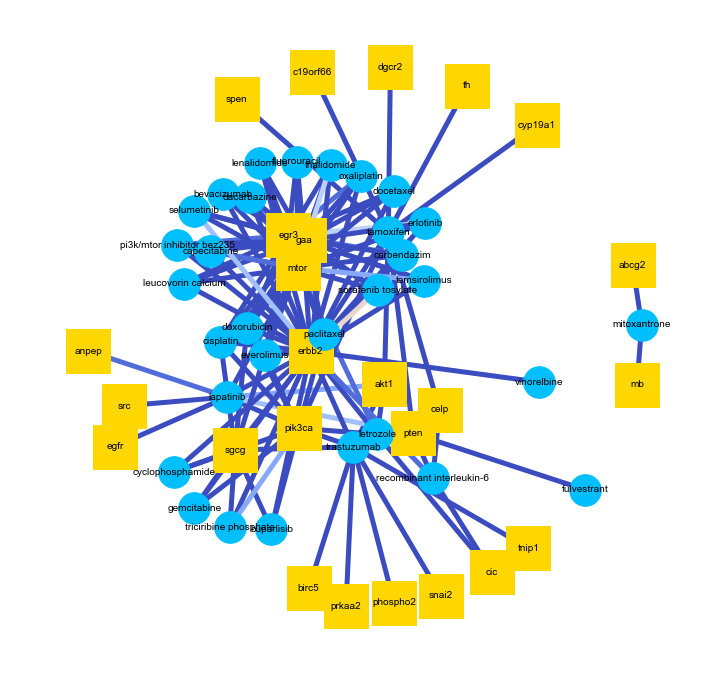

In [344]:
graph_maker.make_display_network(b)

In [314]:
G=nx.Graph()

In [315]:
G.add_edge(gene[1:-1],drug[1:-1],weight=weight)

NameError: name 'gene' is not defined

In [317]:
for (gene,drug), weight in b[0].items():
            G.add_edge(gene[1:-1],drug[1:-1],weight=weight)

In [338]:
get_node_set(G.edges)

[['th',
  'celp',
  'mb',
  'prkaa2',
  'c19orf66',
  'cic',
  'egr3',
  'spen',
  'egfr',
  'akt1',
  'src',
  'anpep',
  'dgcr2',
  'abcg2',
  'erbb2',
  'pten',
  'cyp19a1',
  'gaa',
  'phospho2',
  'tnip1',
  'pik3ca',
  'snai2',
  'mtor',
  'sgcg',
  'birc5'],
 ['tamoxifen',
  'fulvestrant',
  'erlotinib',
  'trastuzumab',
  'fluorouracil',
  'triciribine phosphate',
  'gemcitabine',
  'carbendazim',
  'docetaxel',
  'temsirolimus',
  'paclitaxel',
  'everolimus',
  'sorafenib tosylate',
  'pi3k/mtor inhibitor bez235',
  'cyclophosphamide',
  'lenalidomide',
  'cisplatin',
  'bevacizumab',
  'vinorelbine',
  'recombinant interleukin-6',
  'oxaliplatin',
  'lapatinib',
  'dacarbazine',
  'doxorubicin',
  'capecitabine',
  'buparlisib',
  'selumetinib',
  'thalidomide',
  'mitoxantrone',
  'letrozole',
  'leucovorin calcium']]

In [337]:
def get_node_set(edges):
    node_set=set()
    for node in edges():
        node_set.update(node)
    gene_nodes = []
    drug_nodes = []
    for item in list(node_set):
    #print(item)
        if dg['#'+item+'#']=='gene':
            gene_nodes.append(item)
        if dg['#'+item+'#']=='drug':
            drug_nodes.append(item)
    return [gene_nodes, drug_nodes]